In [41]:
#Roll no: 191EE120
alpha = 1+(120%4)
print(alpha)

1


In [42]:
import numpy as np
import IPython
from scipy import signal as sp
from scipy.io import wavfile

import matplotlib.pyplot as plt

# Problem 1

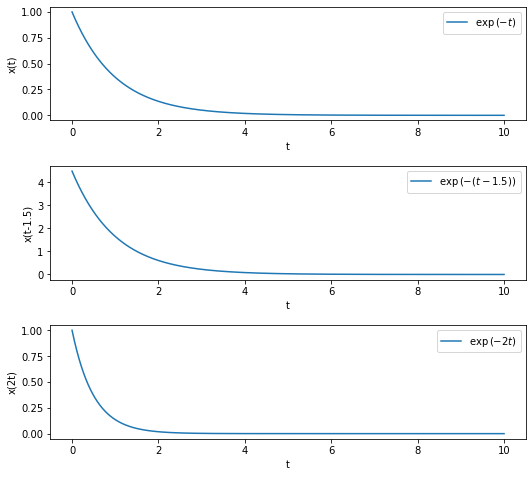

In [43]:
t = np.linspace(0,10,10000)

x1 = np.exp(-t/1)
plt.subplot(3,1,1)
plt.plot(t,x1,label = '$\exp{(-t)}$')
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.subplot(3,1,2)
plt.savefig('1.1' + '.pdf', format='pdf')

x2 = np.exp(-(t-1.5*1)/1)
plt.plot(t,x2,label = '$\exp{(-(t-1.5))}$')
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t-1.5)")
plt.subplot(3,1,3)
plt.savefig('1.2' + '.pdf', format='pdf')

x3 = np.exp(-2*t)
plt.plot(t,x3,label = '$\exp{(-2t)}$')
plt.legend()
plt.xlabel("t")
plt.ylabel("x(2t)")
plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=1.2, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('1.3' + '.pdf', format='pdf')

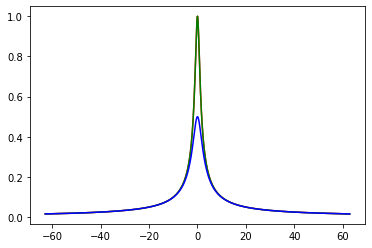

In [44]:
#Fourier Transforms
w = 2*np.pi*np.linspace(-10,10,num = 1001)
Y1 = 1/(1j*w + (1/alpha))
Y2 = (np.exp(-1j*w*(1.5*alpha)))/(1j*w+(1/alpha))
Y3 = 0.5 * 1/((1j*w*0.5)+(1/alpha))              

plt.figure()
plt.plot(w,np.abs(Y1),'r')
plt.plot(w,np.abs(Y2),'g')
plt.plot(w,np.abs(Y3),'b')
plt.savefig('1.4'+ '.pdf', format='pdf')

# Problem 2


In [5]:
t = np.linspace(0,5,5000)
sin_1 = np.sin(2*np.pi*200*1*t)
sin_2 = np.sin(2*np.pi*220*1*t)
y = np.append(sin_1,sin_2)

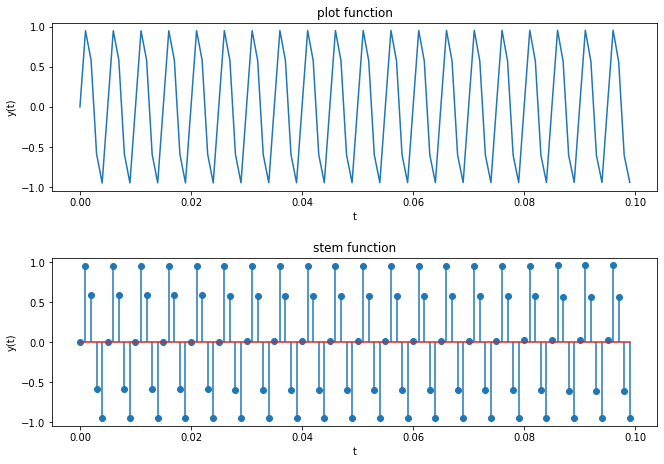

In [45]:
plt.subplot(2,1,1)
plt.plot(t[0:100],y[0:100])
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("plot function")
plt.subplot(2,1,2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("stem function")
plt.stem(t[0:100],y[0:100],use_line_collection = True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('2' + '.pdf', format='pdf')

In [7]:
Fs = 1000
wavfile.write('Tones_generated.wav', Fs, (32767*y).astype(np.int16))
IPython.display.Audio(y, rate=Fs)

# Problem 3

In [36]:
Fs, s = wavfile.read('Track001.wav')
File_data = np.loadtxt('ConvFile1.txt')

In [37]:
conv_signal_1 = sp.convolve(s, File_data, mode='valid', method='auto')

In [38]:
conv_signal_2 = sp.convolve(s, File_data, mode='full', method='auto')

In [39]:
conv_signal_3 = sp.convolve(s, File_data, mode='same', method='auto')

In [40]:
wavfile.write('Convolved_signal_1.wav',Fs,conv_signal_1)
IPython.display.Audio(conv_signal_1, rate=Fs)

In [13]:
wavfile.write('Convolved_signal_2.wav',Fs,conv_signal_2)
IPython.display.Audio(conv_signal_2, rate=Fs)

In [14]:
wavfile.write('Convolved_signal_3.wav',Fs,conv_signal_3)
IPython.display.Audio(conv_signal_3, rate=Fs)

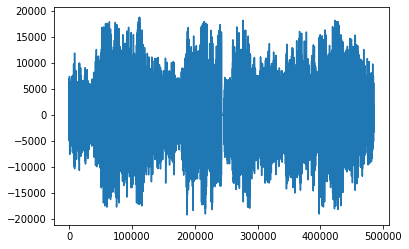

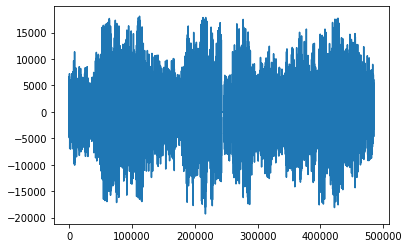

In [46]:
plt.plot(np.fft.fftshift(s))
plt.figure()
plt.plot(np.fft.fftshift(conv_signal_1))
plt.savefig('3' + '.pdf', format='pdf')


The signal remains the same even after convolution

# Problem 4

In [30]:
Fs, speech = wavfile.read('speech.wav')
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(speech, rate=Fs)

sampling rate: 16000Hz


In [31]:
def multiply_signals(x, omega, Fs):
    w = (float(omega) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))
amplitude_modulated = multiply_signals(speech,3000, Fs)

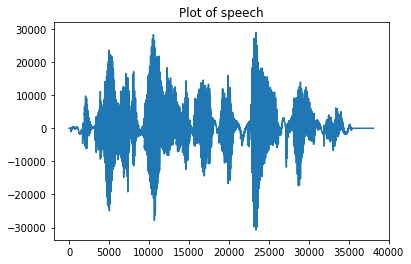

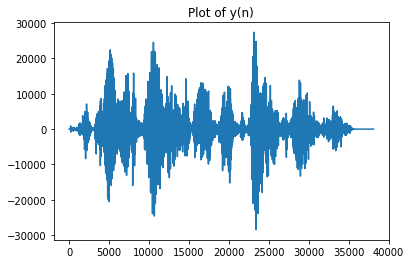

In [47]:
plt.plot(speech)
plt.title("Plot of speech")
plt.figure()
plt.plot(amplitude_modulated)
plt.title("Plot of y(n)")
plt.savefig('4.1' + '.pdf', format='pdf')

In [33]:
wavfile.write('Amplitude_modulated.wav',Fs,amplitude_modulated)
IPython.display.Audio(amplitude_modulated, rate=Fs)

In [34]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X

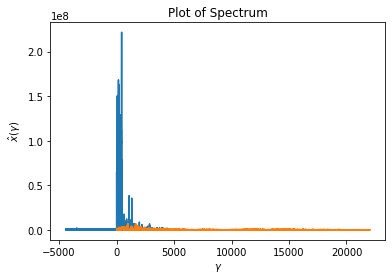

In [48]:
plot_spec(s, Fs, Fs/2);
plot_spec(amplitude_modulated, Fs, Fs/2);
plt.title("Plot of Spectrum")
plt.savefig('4.2' + '.pdf', format='pdf')